In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [2]:
def corr_chart(df_corr, filename):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig(filename, 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)     

In [3]:
inct_dt=pd.read_csv('Agency2_TestData.csv')

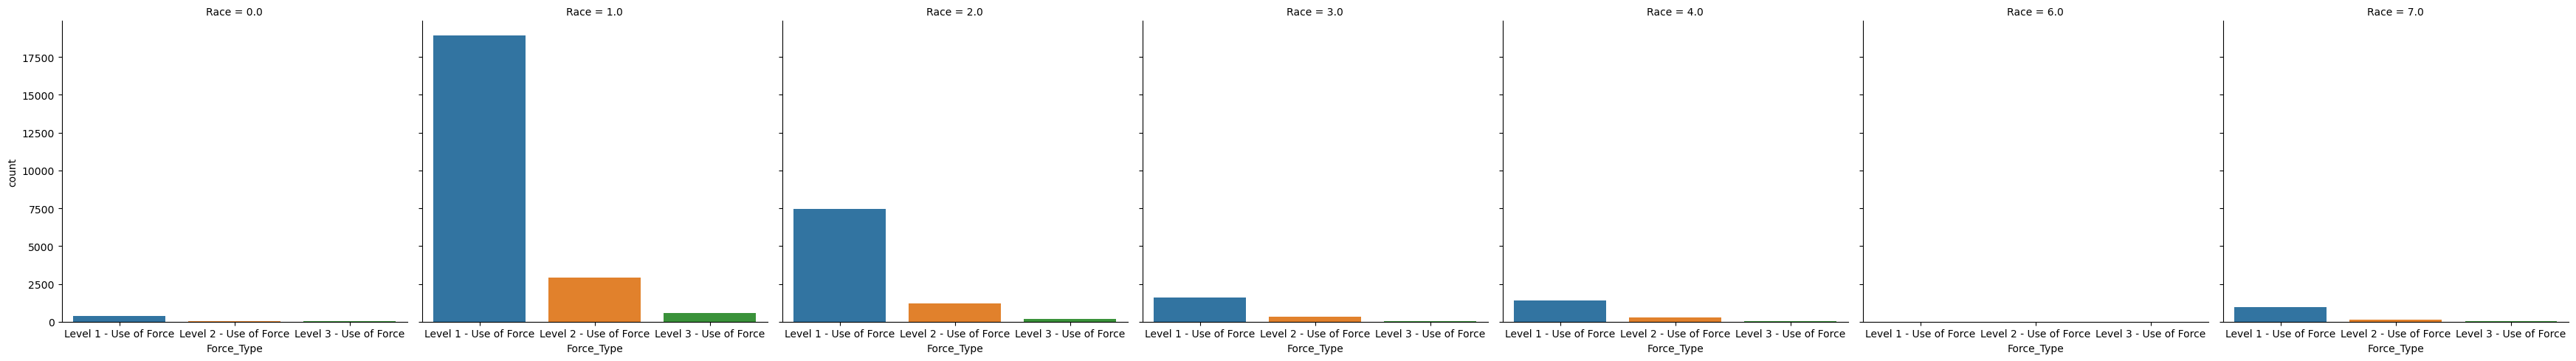

In [4]:
sns.catplot(x='Force_Type', col='Race', kind='count', data=inct_dt)
plt.show()

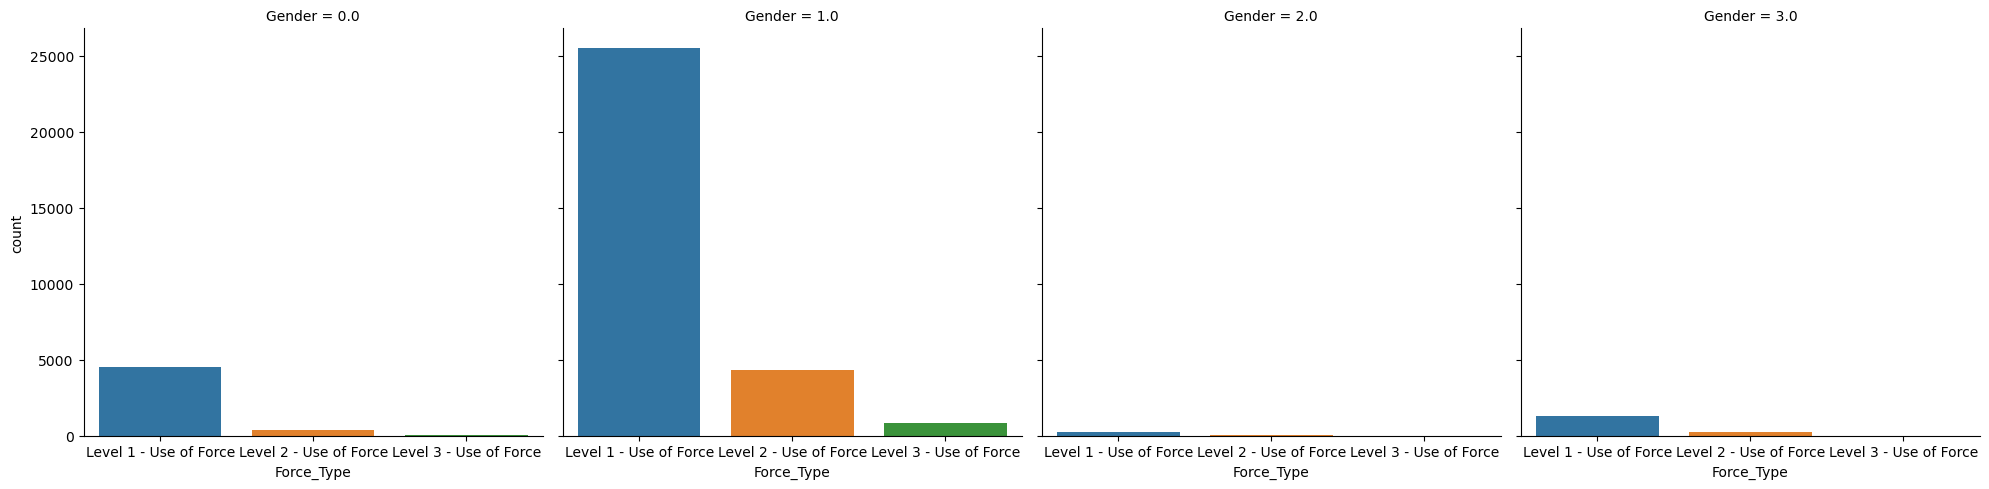

In [5]:
sns.catplot(x='Force_Type', col='Gender', kind='count', data=inct_dt)
plt.show()

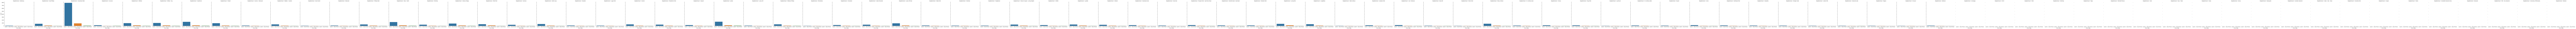

In [6]:
sns.catplot(x='Force_Type', col='Neighborhood', kind='count', data=inct_dt)
plt.show()

In [7]:

#convert forcetype to numeric
forcetype_map={'Level 1 - Use of Force':0, 'Level 2 - Use of Force':1, 'Level 3 - Use of Force':2, 'Level 3 - OIS':3}


inct_dt['Force_Type']=inct_dt['Force_Type'].map(forcetype_map)

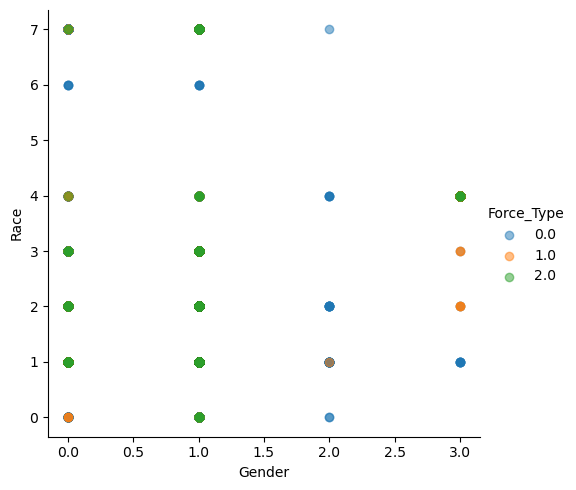

In [8]:
# Does not appear to be visual evidence that younger people survived
sns.lmplot(x='Gender', y='Race', hue='Force_Type', data=inct_dt, fit_reg=False, scatter_kws={'alpha':0.5});
plt.show()

In [9]:
#gender_bins = [0, 1, 2, 3, 4, 5, 6]
#inct_dt['gender_binned'] = pd.cut(inct_dt['Gender'], gender_bins)
#inct_dt.head()
#sns.factorplot(x='Force_Type', col='gender_binned', kind='count', data=inct_dt)
#plt.show()

In [10]:
#race_bins = [0, 1, 2, 3, 4, 5, 6, 7]
#inct_dt['race_binned'] = pd.cut(inct_dt['Race'], race_bins)
#inct_dt.head()
#sns.factorplot(x='Force_Type', col='race_binned', kind='count', data=inct_dt)
#plt.show()

In [11]:
inct_dt = inct_dt.apply(pd.to_numeric, errors='coerce')
inct_dt.fillna(0, inplace=True)

In [12]:
X=inct_dt.copy().drop(columns=['Force_Type'])
Y=inct_dt.loc[:,['Force_Type']]

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [13]:
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold

#train, test = train_test_split(inc_dt, test_size=0.2)


#model = LinearRegression()
#scores = []
#kfold = KFold(n_splits=2, shuffle=True, random_state=42)
#for i, (train, test) in enumerate(kfold.split(X, Y)):
# model.fit(X.iloc[train,:], Y.iloc[train,:])
# score = model.score(X.iloc[test,:], Y.iloc[test,:])
# scores.append(score)
                  
#print(scores)

#lin_reg = LinearRegression()   
#plot_learning_curves(lin_reg, X, Y)
#plt.axis([0, 80, 0, 15])                         
#plt.show()  

[[ 0.00000000e+00 -2.81892565e-18 -2.36423868e-03  4.74547231e-02
   1.15452304e-03  1.08750860e-02  0.00000000e+00  4.56185947e-02]]
Training set score: 0.012537340006857356
Test set score: 0.013217883151063647


/Users/pandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


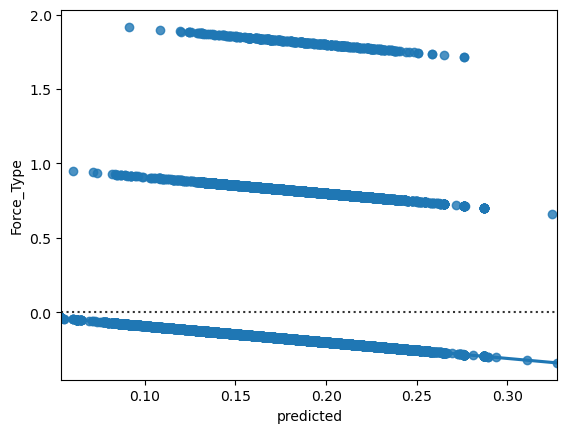

In [14]:
#Linear regression 
lin_train_x, lin_test_x,lin_train_y,lin_test_y=train_test_split(X,Y, test_size=.4,random_state=10)
lin_model = LinearRegression(fit_intercept=True).fit(lin_train_x,lin_train_y)
print(lin_model.coef_)
print("Training set score:" ,lin_model.score(lin_train_x,lin_train_y))
lin_score=lin_model.score(lin_test_x,lin_test_y)
print("Test set score:" ,lin_score)
lin_test_y['predicted']=lin_model.predict(lin_test_x)
sns.residplot(lin_test_y['predicted'],lin_test_y['Force_Type'],lowess=True)
lin_np=np.sqrt(mean_squared_error(lin_test_y['Force_Type'],lin_test_y['predicted']))
plt.show()

Number of features used: 5
Training set score: 0.012537339848307627
Test set score: 0.013218002518318395


/Users/pandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


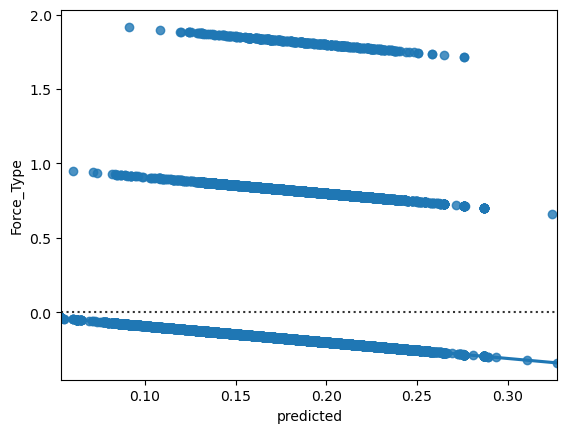

In [15]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_train_x, ridge_test_x,ridge_train_y,ridge_test_y=train_test_split(X,Y, test_size=.4,random_state=10)
ridge_model = Ridge(alpha=1, solver="cholesky",fit_intercept=True).fit(ridge_train_x,ridge_train_y)
print("Number of features used: {}".format(np.sum(ridge_model.coef_ !=0)))
print("Training set score:" ,ridge_model.score(ridge_train_x,ridge_train_y))
ridge_score=ridge_model.score(ridge_test_x,ridge_test_y)
print("Test set score:" ,ridge_score)
ridge_test_y['predicted']=ridge_model.predict(ridge_test_x)
sns.residplot(ridge_test_y['predicted'],ridge_test_y['Force_Type'],lowess=True)
ridge_np=np.sqrt(mean_squared_error(ridge_test_y['Force_Type'],ridge_test_y['predicted']))
plt.show()

In [16]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_train_x, lasso_test_x,lasso_train_y,lasso_test_y=train_test_split(X,Y, test_size=.4,random_state=10)
lasso_model = Lasso(alpha=.1, max_iter = 10000,fit_intercept=True,tol=0.01).fit(lasso_train_x,lasso_train_y)
print("Number of features used: {}".format(np.sum(lasso_model.coef_ !=0)))
print("Training set score:" ,lasso_model.score(lasso_train_x,lasso_train_y))
lasso_score=lasso_model.score(lasso_test_x,lasso_test_y)
print("Test set score:" ,lasso_score)
lasso_test_y['predicted']=lasso_model.predict(lasso_test_x)
sns.residplot(lasso_test_y['predicted'],lasso_test_y['Force_Type'],lowess=True)
lasso_np=np.sqrt(mean_squared_error(lasso_test_y['Force_Type'],lasso_test_y['predicted']))

Number of features used: 1
Training set score: 0.0025880424750446274
Test set score: 0.0029811461620630197


/Users/pandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [17]:
#elastic net
from sklearn.linear_model import ElasticNet
es_train_x, es_test_x,es_train_y,es_test_y=train_test_split(X,Y, test_size=.4,random_state=10)
es_model = ElasticNet(random_state=1, alpha=0.1,fit_intercept=True,tol=0.01).fit(es_train_x,es_train_y)
print("Number of features used: {}".format(np.sum(es_model.coef_ !=0)))
print("Training set score:" ,es_model.score(es_train_x,es_train_y))
es_score=es_model.score(es_test_x,es_test_y)
print("Test set score:" ,es_score)
es_test_y['predicted']=es_model.predict(es_test_x)
sns.residplot(es_test_y['predicted'],es_test_y['Force_Type'],lowess=True)
es_np=np.sqrt(mean_squared_error(es_test_y['Force_Type'],es_test_y['predicted']))

Number of features used: 1
Training set score: 0.002712342873005036
Test set score: 0.003300035508708943


/Users/pandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [18]:
data={'Model':['Linear','Ridge','Lasso','ElasticNet'],
      'RMSE':[lin_np,ridge_np,lasso_np,es_np],
      'Score':[round(lin_score*100,30),round(ridge_score*100,30),
               round(lasso_score*100,30),round(es_score*100,30)]
     }
result=pd.DataFrame(data,columns=['Model','RMSE','Score'])
result.sort_values(by='RMSE')     

,Model,RMSE,Score
1,Ridge,0.432846,1.321800
0,Linear,0.432846,1.321788
3,ElasticNet,0.435016,0.330004
2,Lasso,0.435086,0.298115


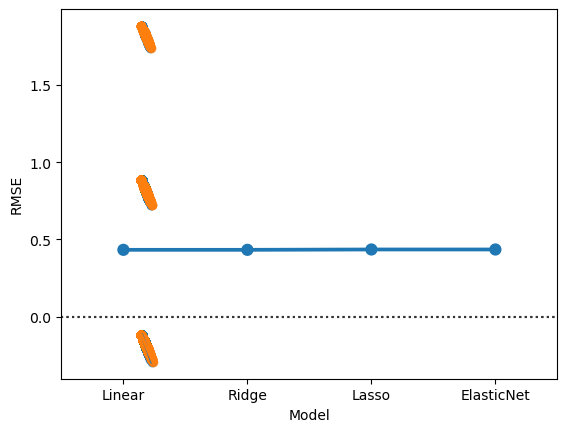

In [19]:
sns.pointplot(x='Model',y="RMSE",data=result)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
lin_train_x, lin_test_x,lin_train_y,lin_test_y=train_test_split(X,Y, test_size=.4,random_state=10)


In [21]:
lin_train_x

,Incident_No,Incident_Date,Race,Gender,Age,Precinct,Neighborhood,Is911Call
1571,0.0,0.0,1.0,1.0,20.0,1.0,0.0,1.0
6419,0.0,0.0,2.0,0.0,27.0,1.0,0.0,1.0
22079,0.0,0.0,4.0,3.0,0.0,5.0,0.0,1.0
5328,0.0,0.0,1.0,1.0,37.0,4.0,0.0,1.0
1712,0.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10201,0.0,0.0,1.0,1.0,18.0,4.0,0.0,1.0
9372,0.0,0.0,1.0,1.0,15.0,4.0,0.0,1.0
28017,0.0,0.0,3.0,1.0,39.0,2.0,0.0,1.0
29199,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0


In [22]:
from sklearn.cluster import KMeans

#km = KMeans(
#    n_clusters=3, init='k-means++',
#    n_init=10, max_iter=300, 
#    tol=1e-04, random_state=0
#)
#y_km = km.fit_predict(X)

In [23]:

# plot the 3 clusters
#plt.scatter(
#    X[y_km == 0, 0], X[y_km == 0, 1],
#    s=50, c='lightgreen',
#    marker='s', edgecolor='black',
#    label='cluster 1'
#)

#plt.scatter(
#    X[y_km == 1, 0], X[y_km == 1, 1],
#    s=50, c='orange',
#    marker='o', edgecolor='black',
#    label='cluster 2'
#)

#plt.scatter(
#    X[y_km == 2, 0], X[y_km == 2, 1],
#    s=50, c='lightblue',
#    marker='v', edgecolor='black',
#    label='cluster 3'
#)

# plot the centroids
#plt.scatter(
#    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#    s=250, marker='*',
#    c='red', edgecolor='black',
#    label='centroids'
#)
#plt.legend(scatterpoints=1)
#plt.grid()
#plt.show()
#view rawkmeans3.py hosted with ❤ by GitHub

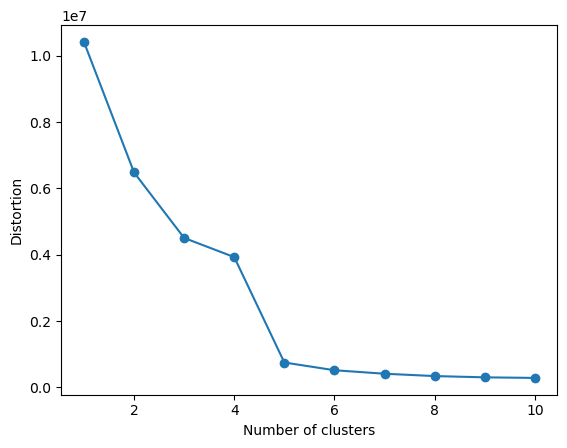

In [24]:

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#view rawkmeans4.py hosted with ❤ by GitHub

In [25]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

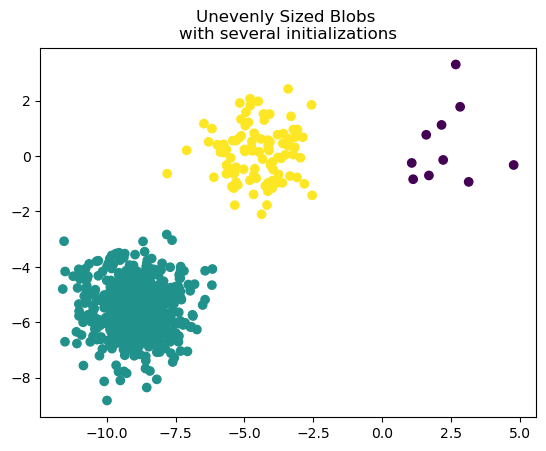

In [26]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=0).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()